In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm
import math
import seaborn as sns
import scipy
#%reset -f

In [2]:
data_0 = pd.read_csv('predictions_df_west_5_wall_floor_0.csv')
print('Length of data frame {}'.format(len(data_0)))

Length of data frame 10000


In [3]:
data_0.head(3)

,Unnamed: 0,X,Y,Z,N_X,N_Y,N_Z,label,cat_label,prediction_label,ground_truth_label,comparison
0,77601,0.999975,0.999949,0.837766,-0.560243,0.825043,-0.075522,wall,3,wall,wall,match
1,226544,0.999992,0.999984,0.834851,-0.499940,0.866100,0.012123,wall,3,wall,wall,match
2,430760,0.999939,0.999876,0.902326,0.615117,-0.779994,0.116483,wall,3,wall,wall,match


In [4]:
data_floor_subset_0 = data_0[['X','Y','Z']].loc[data_0.label =='floor']
data_wall_subset_0 = data_0[['X','Y','Z']].loc[data_0.label =='wall']


print('Length of data frame {}'.format(len(data_floor_subset_0)))

Length of data frame 5000


In [5]:
data_floor_subset_0['regression_parm'] = 1
data_floor_subset_0.head(2)

,X,Y,Z,regression_parm
5000,0.999996,0.999970,0.969438,1
5001,0.999993,0.999971,0.969314,1


In [6]:
x_f= data_floor_subset_0['X'].to_numpy()           
y_f= data_floor_subset_0['Y'].to_numpy()  
z_f= data_floor_subset_0['Z'].to_numpy() 

In [7]:
def calc_plane(x_f, y_f, z_f):
    a = np.column_stack((x_f, y_f, np.ones_like(x_f)))
    return np.linalg.lstsq(a, z_f)[0]


beta = calc_plane(x_f, y_f, z_f)
beta

<ipython-input-7-580085ab5359>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(a, z_f)[0]


array([  57.65532163, -137.90931073,   81.21998236])

In [8]:
def calc_plane_bis(x_f, y_f, z_f):
    a = np.column_stack((x_f, y_f, z_f))
    return np.linalg.lstsq(a, np.ones_like(x_f))[0]

In [9]:
bis = calc_plane_bis(x_f, y_f, z_f)
bis

<ipython-input-8-017166b6de1a>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(a, np.ones_like(x_f))[0]


array([ 1.66793754e+00, -6.68967945e-01,  1.05571917e-03])

In [10]:
def project_points(x, y, z, a, b, c):
    """
    Projects the points with coordinates x, y, z onto the plane
    defined by a*x + b*y + c*z = 1
    """
    vector_norm = a*a + b*b + c*c
    normal_vector = np.array([a, b, c]) / np.sqrt(vector_norm)
    point_in_plane = np.array([a, b, c]) / vector_norm

    points = np.column_stack((x, y, z))
    points_from_point_in_plane = points - point_in_plane
    proj_onto_normal_vector = np.dot(points_from_point_in_plane,
                                     normal_vector)
    proj_onto_plane = (points_from_point_in_plane -
                       proj_onto_normal_vector[:, None]*normal_vector)

    #return point_in_plane + proj_onto_plane
    return  proj_onto_plane

In [11]:
a = beta[0]
b = beta[1]
c = beta[2]
projected_points_floor = project_points(x_f, y_f, z_f, a, b, c)

In [12]:
projected_points_floor = project_points(x_f, y_f, z_f, a, b, c)

In [13]:
projected_points_floor.shape

(5000, 3)

In [14]:
x_floor_proj = projected_points_floor[:,0]
y_floor_proj = projected_points_floor[:,1]
z_floor_proj = projected_points_floor[:,2]

In [15]:
x_w= data_wall_subset_0['X'].to_numpy()           
y_w= data_wall_subset_0['Y'].to_numpy()  
z_w= data_wall_subset_0['Z'].to_numpy() 

In [16]:
projected_points_wall = project_points(x_w, y_w, z_w, a, b, c)

x_wall_proj = projected_points_wall[:,0]
y_wall_proj = projected_points_wall[:,1]
z_wall_proj = projected_points_wall[:,2]

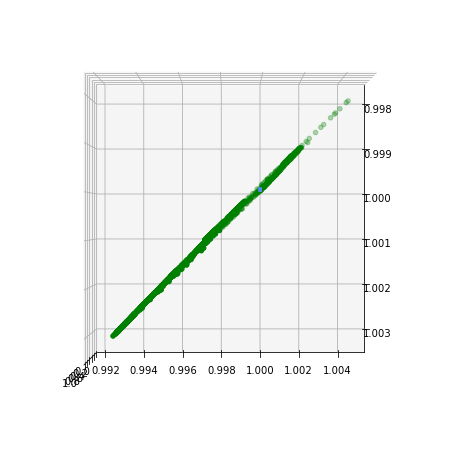

In [17]:
X,Y = np.meshgrid(x_f,y_f)
Z = z_f


X_f,Y_f = np.meshgrid(x_f,y_f)
Z=(a * X_f ) + (b * Y_f) +(c)

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

ax.scatter(x_floor_proj,y_floor_proj, color = 'green')
#ax.scatter(x_wall_proj,y_wall_proj, color ='red')


surf = ax.plot_surface(X, Y, Z, color = 'cornflowerblue',alpha=0.1, shade =False)

for angle in range(0,360): 
    ax.view_init(90,angle)

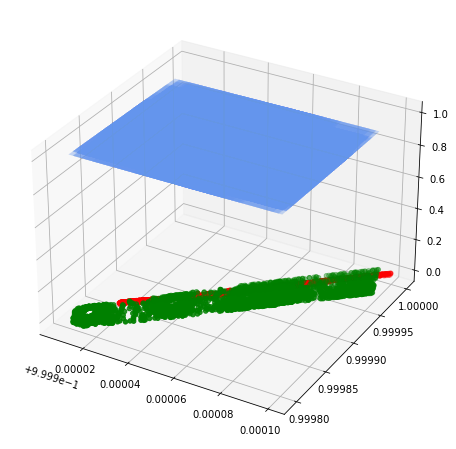

In [18]:
X,Y = np.meshgrid(x_f,y_f)
Z = z_f


X_f,Y_f = np.meshgrid(x_f,y_f)
Z=(a * X_f ) + (b * Y_f) +(c)

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

ax.scatter(data_floor_subset_0['X'],  data_floor_subset_0['Y'], color = 'green')
ax.scatter(data_wall_subset_0['X'],  data_wall_subset_0['Y'], color ='red')


surf = ax.plot_surface(X, Y, Z, color = 'cornflowerblue',alpha=0.1, shade =False)

##### For Wall Projections

In [19]:
x_w= data_wall_subset_0['X'].to_numpy()           
y_w= data_wall_subset_0['Y'].to_numpy()  
z_w= data_wall_subset_0['Z'].to_numpy() 

In [20]:
projected_points_wall = project_points(x_w, y_w, z_w, a, b, c)

projected_points_wall

array([[1.02429047, 0.94178733, 0.87201996],
       [1.02478635, 0.94067533, 0.86977979],
       [1.01379184, 0.96673963, 0.9218409 ],
       ...,
       [1.01735361, 0.95825282, 0.90490215],
       [1.02313016, 0.94441772, 0.87730995],
       [1.01025769, 0.9751479 , 0.93862669]])

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
x= data_floor_subset_0['X'].to_numpy()           
y= data_floor_subset_0['Y'].to_numpy()  

print(x,y)

[0.99999628 0.99999285 0.99994584 ... 0.9999642  0.99997273 0.99995605] [0.99997046 0.99997056 0.99986225 ... 0.99992293 0.99991853 0.99989342]


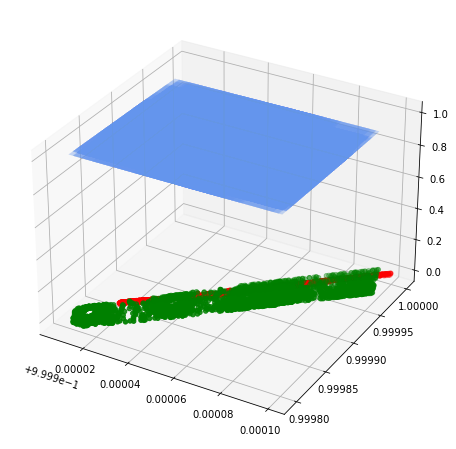

In [23]:
x= data_floor_subset_0['X'].to_numpy()           
y= data_floor_subset_0['Y'].to_numpy()  

X,Y = np.meshgrid(x,y)
Z=(a * X ) + (b * Y) +(c)

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

ax.scatter(data_floor_subset_0['X'],  data_floor_subset_0['Y'], color = 'green')
ax.scatter(data_wall_subset_0['X'],  data_wall_subset_0['Y'], color ='red')


surf = ax.plot_surface(X, Y, Z, color = 'cornflowerblue',alpha=0.1, shade =False)



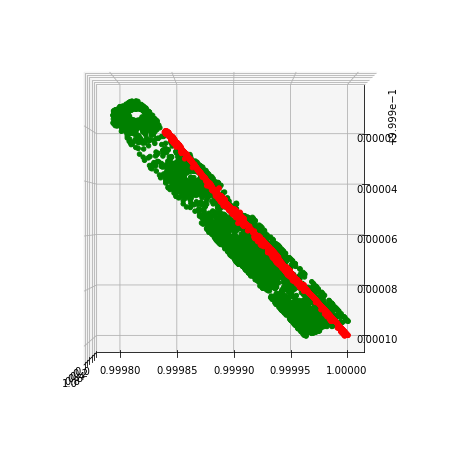

In [24]:
x= data_floor_subset_0['X'].to_numpy()           
y= data_floor_subset_0['Y'].to_numpy()  

X,Y = np.meshgrid(x,y)
Z=(a * X ) + (b * Y) +(c)

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, color = 'blue',alpha=0, shade = False)

ax.scatter(data_floor_subset_0['X'],  data_floor_subset_0['Y'], color = 'green')
ax.scatter(data_wall_subset_0['X'],  data_wall_subset_0['Y'], color ='red')



for angle in range(0,360): 
    ax.view_init(90,angle)

In [25]:
data_1 = pd.read_csv('predictions_df_west_5_wall_floor_1.csv')
print('Length of data frame {}'.format(len(data_1)))

Length of data frame 10000


In [26]:
data_1.head(3)

,Unnamed: 0,X,Y,Z,N_X,N_Y,N_Z,label,cat_label,prediction_label,ground_truth_label,comparison
0,307337,0.999998,0.999993,0.982058,-0.609439,0.750593,-0.274465,wall,3,wall,wall,match
1,218689,0.999945,0.999888,0.931303,-0.470900,0.884443,0.047686,wall,3,wall,wall,match
2,167063,0.999987,0.999973,0.866510,-0.559273,0.834042,0.015061,wall,3,wall,wall,match


In [27]:
data_floor_subset_1 = data_1[['X','Y','Z']].loc[data_1.label =='floor']
data_wall_subset_1 = data_1[['X','Y','Z']].loc[data_1.label =='wall']


print('Length of data frame {}'.format(len(data_floor_subset_1)))

Length of data frame 5000


In [28]:
data_floor_subset_1['regression_parm'] = 1
data_floor_subset_1.head(2)

,X,Y,Z,regression_parm
5000,0.999921,0.999859,0.970073,1
5001,0.999990,0.999963,0.931222,1


In [29]:
A1 = data_floor_subset_1[['X','Y','regression_parm']]
y1 = data_floor_subset_1['Z']

In [30]:
sol_1 = np.linalg.lstsq(A1, y1, rcond=None)[0]
print(sol_1)

plane_1 = (a * data_floor_subset_1['X']) + (b * data_floor_subset_1['Y']) +(c * data_floor_subset_1['regression_parm'])


[-147.37911434   49.12000699   99.19209668]


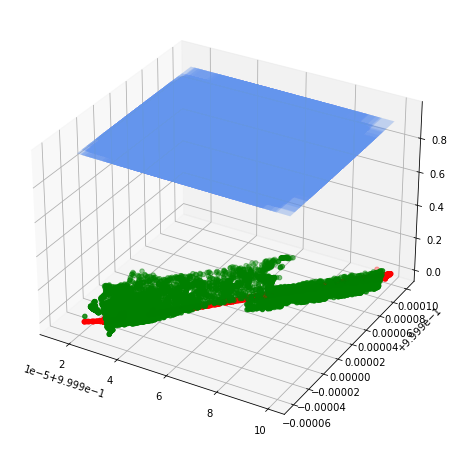

In [31]:
x1= data_floor_subset_1['X'].to_numpy()           
y1= data_floor_subset_1['Y'].to_numpy()  

X1,Y1 = np.meshgrid(x1,y1)
Z1=(sol_1[0] * X1 ) + (sol_1[1] * Y1) +(sol_1[2])

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

ax.scatter(data_floor_subset_1['X'],  data_floor_subset_1['Y'], color = 'green')
ax.scatter(data_wall_subset_1['X'],  data_wall_subset_1['Y'], color ='red')


surf_1 = ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue',alpha=0.1,shade=False)


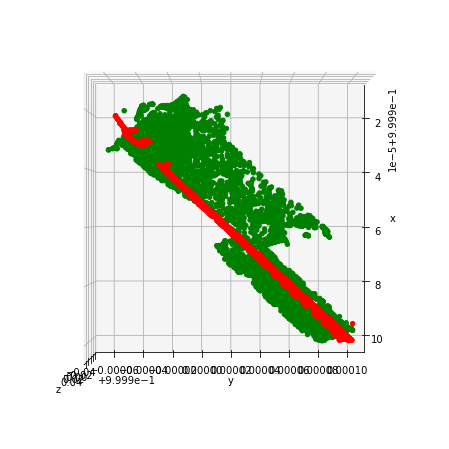

In [32]:
x1= data_floor_subset_1['X'].to_numpy()           
y1= data_floor_subset_1['Y'].to_numpy()  

X1,Y1 = np.meshgrid(x1,y1)
Z1=(sol_1[0] * X1 ) + (sol_1[1] * Y1) +(sol_1[2])

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

#ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue', shade = False, linewidth=0.1, zorder=1, alpha =0.02)

ax.scatter(data_floor_subset_1['X'],  data_floor_subset_1['Y'], color = 'green', label ='top')
ax.scatter(data_wall_subset_1['X'],  data_wall_subset_1['Y'], color ='red',label='top')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

for angle in range(0,360): 
    ax.view_init(90,angle)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='X', ylabel='Y'>

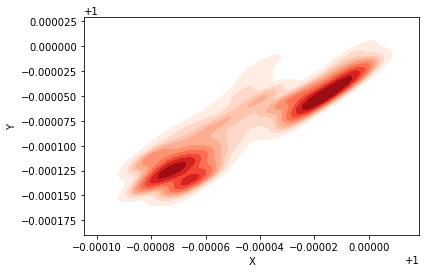

In [33]:
sns.kdeplot(data_floor_subset_1['X'], 
            data_floor_subset_1['Y'],
            color='r', shade=True,
            cmap="Reds", shade_lowest=False)



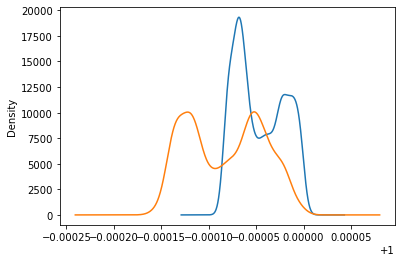

In [34]:
ax_x = data_floor_subset_1['X'].plot.kde()

ax_y = data_floor_subset_1['Y'].plot.kde()


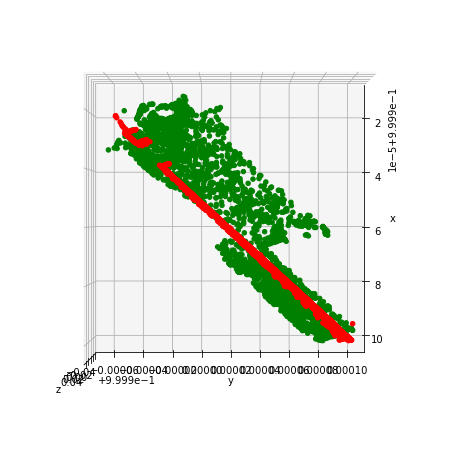

In [35]:
x1= data_floor_subset_1['X'].to_numpy()           
y1= data_floor_subset_1['Y'].to_numpy()  

X1,Y1 = np.meshgrid(x1,y1)
Z1=(sol_1[0] * X1 ) + (sol_1[1] * Y1) +(sol_1[2])

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

#ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue', shade = False, linewidth=0.1, zorder=1, alpha =0.02)

ax.scatter(data_floor_subset_1['X'].head(int(len(data_floor_subset_1)*(60/100))),  data_floor_subset_1['Y'].head(int(len(data_floor_subset_1)*(60/100))), color = 'green', label ='top')
ax.scatter(data_wall_subset_1['X'].head(int(len(data_floor_subset_1)*(60/100))),  data_wall_subset_1['Y'].head(int(len(data_floor_subset_1)*(60/100))), color ='red',label='top')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

for angle in range(0,360): 
    ax.view_init(90,angle)

plt.show()

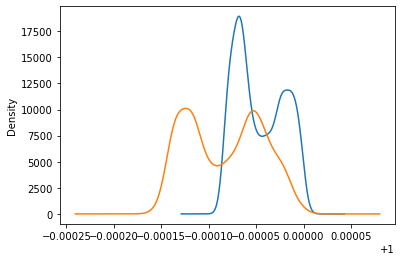

In [36]:
ax_x_new = data_floor_subset_1['X'].head(int(len(data_floor_subset_1)*(60/100))).plot.kde()

ax_y_new =  data_floor_subset_1['Y'].head(int(len(data_floor_subset_1)*(60/100))).plot.kde()

In [37]:
data_floor_subset_0

A = data_floor_subset_0 [['X','Y','regression_parm']]

y = data_floor_subset_0['Z']

### replicating the experiment

In [38]:
x_f= data_floor_subset_0['X'].to_numpy()           
y_f= data_floor_subset_0['Y'].to_numpy()  
z_f= data_floor_subset_0['Z'].to_numpy() 



In [39]:
def calc_plane_bis(x, y, z):
    a = np.column_stack((x, y, z))
    return np.linalg.lstsq(a, np.ones_like(x))[0]
beta = calc_plane_bis(x_f, y_f, z_f)

<ipython-input-39-15f6dcdea182>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(a, np.ones_like(x))[0]


In [40]:
print(beta)

a = beta[0]
b = beta[1]
c = beta[2]

[ 1.66793754e+00 -6.68967945e-01  1.05571917e-03]


In [41]:
def project_points(x, y, z, a, b, c):
    """
    Projects the points with coordinates x, y, z onto the plane
    defined by a*x + b*y + c*z = 1
    """
    vector_norm = a*a + b*b + c*c
    normal_vector = np.array([a, b, c]) / np.sqrt(vector_norm)
    point_in_plane = np.array([a, b, c]) / vector_norm

    points = np.column_stack((x, y, z))
    points_from_point_in_plane = points - point_in_plane
    proj_onto_normal_vector = np.dot(points_from_point_in_plane,
                                     normal_vector)
    proj_onto_plane = (points_from_point_in_plane -
                       proj_onto_normal_vector[:, None]*normal_vector)

    return point_in_plane + proj_onto_plane

In [42]:
output_projected_floor = project_points(x_f, y_f, z_f, a, b, c)

In [43]:
x_proj_floor = output_projected_floor[:,0]
y_proj_floor = output_projected_floor[:,1]
z_proj_floor = output_projected_floor[:,2]

Text(0.5, 0, 'z ')

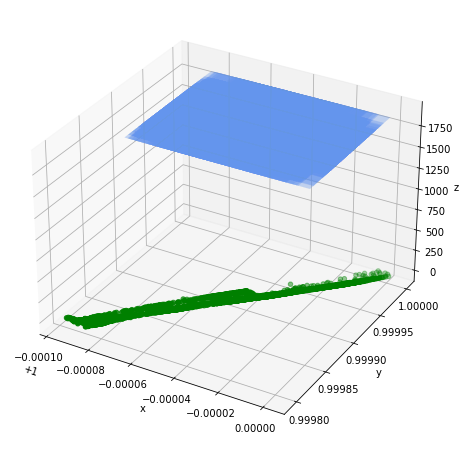

In [44]:
x1= data_floor_subset_1['X'].to_numpy()   # original data        
y1= data_floor_subset_1['Y'].to_numpy()  # original data   

X1,Y1 = np.meshgrid(x1,y1)
Z1=(a/c * X1 ) + (b/c * Y1) +(1/c)  # regression equation to estimate z

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

##ax.scatter(data_floor_subset_1['X'],  data_floor_subset_1['Y'], color = 'green')
##ax.scatter(data_wall_subset_1['X'],  data_wall_subset_1['Y'], color ='red')
# ax.plot3D(x_proj, y_proj, z_proj)

ax.scatter(x_proj_floor, y_proj_floor, z_proj_floor,color ='green')


ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue',alpha=0.1,shade=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

In [45]:
output_projected_wall = project_points(x_w, y_w, z_w, a, b, c)

In [46]:
x_proj_wall = output_projected_wall[:,0]
y_proj_wall = output_projected_wall[:,1]
z_proj_wall = output_projected_wall[:,2]

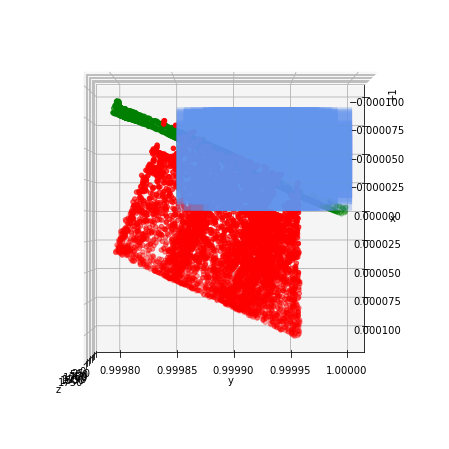

In [47]:
x1= data_floor_subset_1['X'].to_numpy()   # original data        
y1= data_floor_subset_1['Y'].to_numpy()  # original data   

X1,Y1 = np.meshgrid(x1,y1)
Z1=(a/c* X1 ) + (b/c * Y1) +(1/c)  # regression equation to estimate z

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

##ax.scatter(data_floor_subset_1['X'],  data_floor_subset_1['Y'], color = 'green')
##ax.scatter(data_wall_subset_1['X'],  data_wall_subset_1['Y'], color ='red')
# ax.plot3D(x_proj, y_proj, z_proj)

ax.scatter(x_proj_floor, y_proj_floor, z_proj_floor,color ='green')
ax.scatter(x_proj_wall, y_proj_wall, z_proj_wall,color ='red')




ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue',alpha=0.1,shade=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

for angle in range(0,360): 
    ax.view_init(90,angle)

In [48]:
X1.shape

(5000, 5000)

In [49]:
# import numpy as np

# def calc_plane(x, y, z):
#     a = np.column_stack((x, y, np.ones_like(x)))
#     return np.linalg.lstsq(a, z)[0]

# xx = np.random.rand(1000)
# yy = np.random.rand(1000)
# zz = 4*x + 5*y + 7 + np.random.rand(1000)*.1
# calc_plane(xx, yy, zz)


# def calc_plane_bis(x, y, z):
#     a = np.column_stack((x, y, z))
#     return np.linalg.lstsq(a, np.ones_like(x))[0]
# z2 = calc_plane_bis(xx, yy, zz)

# l1 =project_points(xx, yy, zz, *calc_plane_bis(xx, yy, zz))

# X1,Y1 = np.meshgrid(xx,yy)
# Z1=(a/c* X1 ) + (b/c * Y1) +(1/c)  # regression equation to estimate z

# fig = plt.figure(figsize = (10,8))
# ax = fig.gca(projection='3d')

# ax.plot_surface(X1, Y1, Z1, color = 'cornflowerblue',alpha=0.1,shade=False)
# ax.scatter(l1[:,0],l1[:,1],l1[:,2],color ='green')

# for angle in range(0,360): 
#     ax.view_init(60,angle)

In [50]:
origin_on_plane = 

SyntaxError: invalid syntax (<ipython-input-50-c75ca357f13e>, line 1)